# Info

# Importing libraries

In [3]:
# aula 01 e 02
import numpy as np
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt
from IPython.display import Image

# aula 03
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import shapiro, mannwhitneyu

# aula 04 e 05
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## AULA 01 - ESTATÍSTICA E ALGEBRA LINEAR EM PYTHON

### Algebra linear

$$ \alpha + \beta = 10$$

Escalar, vetor e matriz

In [4]:
x = 2 # escalar
x2 = np.array([1,2,3]) # -> vetor escalar com três elementos
x3 = np.array([[1],[2],[3]]) # -> matriz com três elementos vetores com um elemento escalar(2d)
x4 = np.array([[1,2,3], [1,2,3], [1,2,3]]) # -> matriz quadrada (tradicional)

In [5]:
print(x2)
print()
print(x3)
print()
print(x4)

[1 2 3]

[[1]
 [2]
 [3]]

[[1 2 3]
 [1 2 3]
 [1 2 3]]


##### Operações com arrays

##### Soma & subtração
Combinação lnear, soma de elementos multiplicaods entre si.

Fez uma distributiva criando uma matriz nova.

In [6]:
x2 + x3

array([[2, 3, 4],
       [3, 4, 5],
       [4, 5, 6]])

Aqui não ocorreu o mesmo, pois as fontes (x3 e x4) não são da mesma coisa, ele forçou uma distributiva mas com coisas de dimensões (natureza) diferentes

In [7]:
x3 + x4

array([[2, 3, 4],
       [3, 4, 5],
       [4, 5, 6]])

Distribuição com dimensões (naturezas) iguais, o que é o correta a acontecer.

In [8]:
x4 + x4

array([[2, 4, 6],
       [2, 4, 6],
       [2, 4, 6]])

! Somar e subtrair, só vetores/arrays de mesma natureza

##### Multiplicação
arr1 (x,y) / arr2 (z,w) y = z -> resultado arr3 (x,w)

testando a máxima acima (dimensões foras da regra):

In [9]:
# np.dot(x3,x4)

In [10]:
np.dot(x4,x3)

array([[14],
       [14],
       [14]])

##### Divisão
x4 / x3

In [11]:
x4, x3

(array([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]]),
 array([[1],
        [2],
        [3]]))

Primeiro caso

In [12]:
x4 / x3

array([[1.        , 2.        , 3.        ],
       [0.5       , 1.        , 1.5       ],
       [0.33333333, 0.66666667, 1.        ]])

Segunda caso

In [13]:
x3 / x4

array([[1.        , 0.5       , 0.33333333],
       [2.        , 1.        , 0.66666667],
       [3.        , 1.5       , 1.        ]])

Terceiro caso

In [14]:
# x3 / x5


-> Não funciona, aí que entra: **equação fundamental da álgebra linear** que visa possibilitar conceitos e aplicações futuras como metódos dos mínimos quadrados (importante para trabalhar e entender algoritmos como regressão linear).

#### Pandas, dataframe

In [15]:
lista = np.array([1,2,3,4,5])
df = pd.DataFrame({'coluna 1': lista,
                  'coluna 2': lista})
df

,coluna 1,coluna 2
0,1,1
1,2,2
2,3,3
3,4,4
4,5,5


#### "Visualizando" Algebra linear

In [16]:
x1, y1 = -1, 0
x2, y2 = 0, 1
x3, y3 = 1, 2
x4, y4 = 2, 1

x = [x1, x2, x3, x4]
y = [y1, y2, y3, y4]

Text(0.5, 1.0, 'Interpolação da reta sobre todos os pontos - sem otimização pelo MMQ')

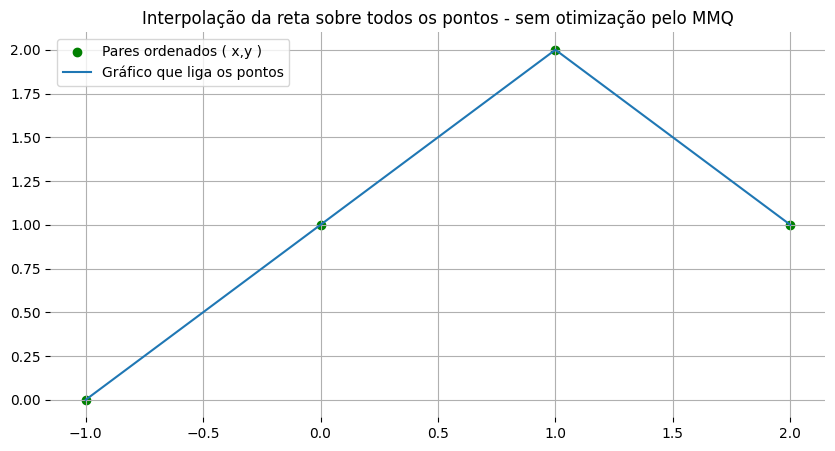

In [17]:
plt.figure(figsize=(10,5))
plt.scatter(x1, y1, color = 'green', label='Pares ordenados ( x,y )')
plt.scatter(x2, y2, color = 'green')
plt.scatter(x3, y3, color = 'green')
plt.scatter(x4, y4, color = 'green')

plt.plot(x, y, label = 'Gráfico que liga os pontos')
plt.grid(True)
plt.box(False)
plt.legend()
plt.title('Interpolação da reta sobre todos os pontos - sem otimização pelo MMQ')

função para achar a "reta" numa função linear:

$$ y = mx + r $$

In [18]:
A = np.array([[-1,1], [0,1], [1,1], [2,1]])
y = np.array([[y1], [y2], [y3], [y4]])

In [19]:
A, y

(array([[-1,  1],
        [ 0,  1],
        [ 1,  1],
        [ 2,  1]]),
 array([[0],
        [1],
        [2],
        [1]]))

Metódo dos mínimos quadrados:

In [20]:
(m, n) = np.dot(np.dot(np.linalg.pinv(np.dot(A.T, A)), A.T), y)
print(m, n)

[0.4] [0.8]


In [21]:
n

array([0.8])

Text(0.5, 1.0, 'Interpolação da reta sobre todos os pontos com otimização pelo MMQ')

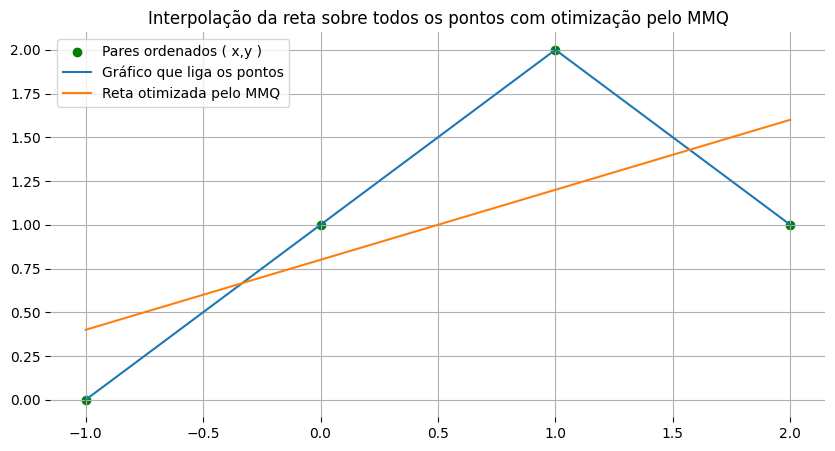

In [22]:
plt.figure(figsize=(10,5))
plt.scatter(x1, y1, color = 'green', label='Pares ordenados ( x,y )')
plt.scatter(x2, y2, color = 'green')
plt.scatter(x3, y3, color = 'green')
plt.scatter(x4, y4, color = 'green')

v_x = np.linspace(-1, 2)

plt.plot(x, y, label = 'Gráfico que liga os pontos')
plt.plot(v_x, m * v_x + n, label='Reta otimizada pelo MMQ')
plt.grid(True)
plt.box(False)
plt.legend()
plt.title('Interpolação da reta sobre todos os pontos com otimização pelo MMQ')

In [23]:
m * v_x + n

array([0.4       , 0.4244898 , 0.44897959, 0.47346939, 0.49795918,
       0.52244898, 0.54693878, 0.57142857, 0.59591837, 0.62040816,
       0.64489796, 0.66938776, 0.69387755, 0.71836735, 0.74285714,
       0.76734694, 0.79183673, 0.81632653, 0.84081633, 0.86530612,
       0.88979592, 0.91428571, 0.93877551, 0.96326531, 0.9877551 ,
       1.0122449 , 1.03673469, 1.06122449, 1.08571429, 1.11020408,
       1.13469388, 1.15918367, 1.18367347, 1.20816327, 1.23265306,
       1.25714286, 1.28163265, 1.30612245, 1.33061224, 1.35510204,
       1.37959184, 1.40408163, 1.42857143, 1.45306122, 1.47755102,
       1.50204082, 1.52653061, 1.55102041, 1.5755102 , 1.6       ])

***

### Estatística
class about concepts (no code)

***

## AULA 02 - BIBLIOTECAS FUNDAMENTAIS E PRIMEIROS PASSOS EM ML

### Need to know

#### Models tree

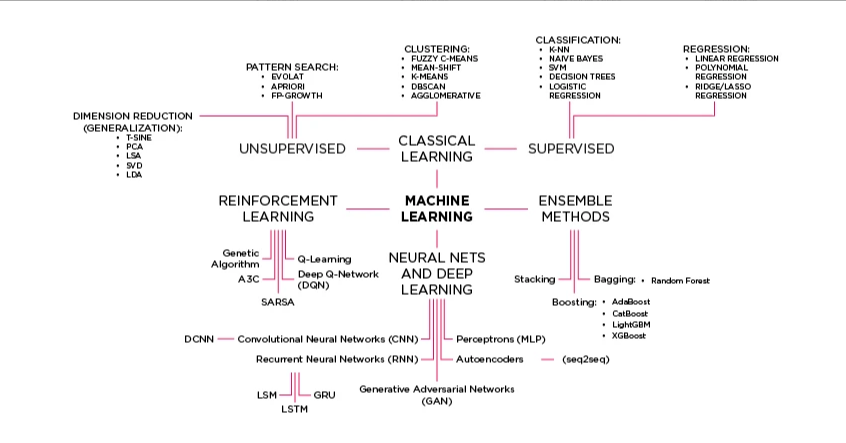

In [24]:
Image(filename='../images/models.PNG')

#### Pipeline

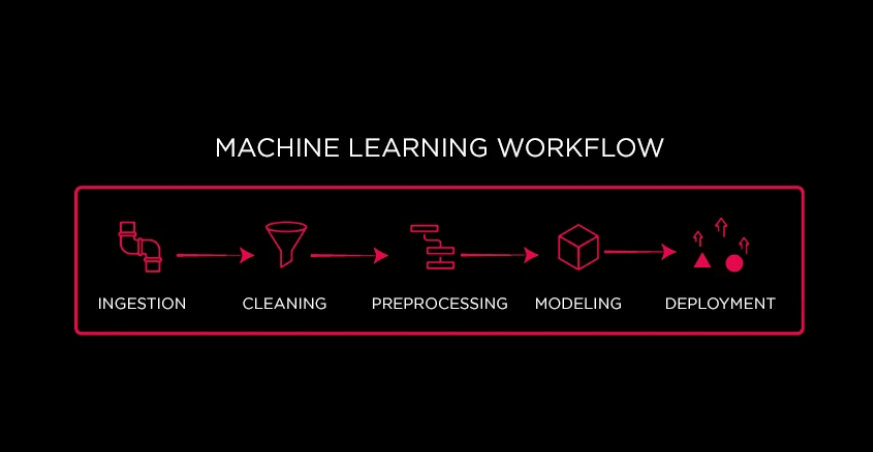

In [25]:
Image(filename='../images/pipeline.PNG')

#### Steps

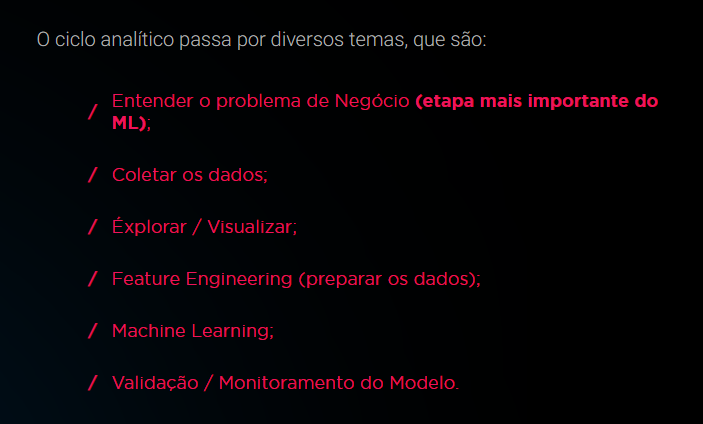

In [26]:
Image(filename='../images/steps.PNG')

Reading file with Pandas

In [27]:
df_excel = pd.read_excel('../data/Chess.xlsx', sheet_name='Chess')
df_csv = pd.read_csv('../data/Tomato.csv', sep=',')

In [28]:
# lines and columns count
df_csv.shape

(2741, 6)

In [29]:
# File quick info
df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rated           20058 non-null  bool   
 1   created_at      20058 non-null  float64
 2   last_move_at    20058 non-null  float64
 3   turns           20058 non-null  int64  
 4   victory_status  20058 non-null  object 
 5   winner          20058 non-null  object 
 6   increment_code  20058 non-null  object 
 7   white_id        20058 non-null  object 
 8   white_rating    20058 non-null  int64  
 9   black_id        20058 non-null  object 
 10  black_rating    20058 non-null  int64  
 11  opening_eco     20058 non-null  object 
 12  opening_name    20058 non-null  object 
 13  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(7)
memory usage: 2.0+ MB


In [30]:
# Quick descritive stats
df_csv.describe().T

,count,mean,std,min,25%,50%,75%,max
Minimum,2741.0,35.089748,16.648425,8.0,22.0,30.0,45.0,115.0
Maximum,2741.0,41.281284,17.364135,12.0,30.0,38.0,50.0,120.0
Average,2741.0,38.185516,16.970949,10.0,25.0,35.0,47.5,117.5


In [31]:
# unique values for 'victory_status' column
set(df_excel['victory_status'])

{'draw', 'mate', 'outoftime', 'resign'}

In [32]:
df_csv.head()

,Date,Unit,Minimum,Maximum,Average,Market
0,2013-06-16,Kg,26,32,29.0,Tomato
1,2013-06-17,Kg,20,25,22.5,Tomato
2,2013-06-18,Kg,22,26,24.0,Tomato
3,2013-06-19,Kg,24,28,26.0,Tomato
4,2013-06-20,Kg,22,26,24.0,Tomato


In [33]:
# Creating funciton to categorize tomatos
def categorizar_tomate_media(media):
    if media >= 40 and media <= 70:
        return 'tomate medio'
    elif media < 40:
        return 'tomate pequeno'
    else:
        return 'tomatão'

In [34]:
# Creating new column with category
df_csv['categoria_tomate'] = df_csv['Average'].apply(categorizar_tomate_media)

In [35]:
# Cheking column created
df_csv.categoria_tomate.value_counts()

tomate pequeno    1638
tomate medio       954
tomatão            149
Name: categoria_tomate, dtype: int64

In [36]:
# quick grouping
df_csv.groupby(['categoria_tomate']).describe()

Minimum                                                      \
                   count       mean       std   min   25%   50%   75%    max   
categoria_tomate                                                               
tomate medio       954.0  47.818658  8.203065  30.0  40.0  45.0  55.0   65.0   
tomate pequeno    1638.0  23.978022  7.175572   8.0  18.0  25.0  30.0   38.0   
tomatão            149.0  75.744966  7.324666  65.0  70.0  75.0  80.0  115.0   

                 Maximum             ...              Average             \
                   count       mean  ...   75%    max   count       mean   
categoria_tomate                     ...                                   
tomate medio       954.0  55.009434  ...  60.0   75.0   954.0  51.414046   
tomate pequeno    1638.0  29.528694  ...  35.0   44.0  1638.0  26.753358   
tomatão            149.0  82.583893  ...  85.0  120.0   149.0  79.164430   

                                                           
                       std   min   25%   50%   75%    max  
categoria_tomate                                           
tomate medio      8.272792  40.0  45.0  50.0  57.5   70.0  
tomate pequeno    7.191735  10.0  21.5  27.5  32.5   39.5  
tomatão           7.367396  70.5  75.0  77.5  82.5  117.5  

[3 rows x 24 columns]

In [37]:
# Filtering rows
filtro = df_csv['Average'] < 40
df_csv.loc[filtro]

,Date,Unit,Minimum,Maximum,Average,Market,categoria_tomate
0,2013-06-16,Kg,26,32,29.0,Tomato,tomate pequeno
1,2013-06-17,Kg,20,25,22.5,Tomato,tomate pequeno
2,2013-06-18,Kg,22,26,24.0,Tomato,tomate pequeno
3,2013-06-19,Kg,24,28,26.0,Tomato,tomate pequeno
4,2013-06-20,Kg,22,26,24.0,Tomato,tomate pequeno
...,...,...,...,...,...,...,...
2736,2021-05-09,Kg,10,15,12.5,Tomato,tomate pequeno
2737,2021-05-10,Kg,10,15,12.5,Tomato,tomate pequeno
2738,2021-05-11,Kg,10,15,12.5,Tomato,tomate pequeno
2739,2021-05-12,Kg,30,35,32.5,Tomato,tomate pequeno


### Numpy
Handling data with Numpy

np.array

In [38]:
arr_list = np.array([1,2,3, 4, 5, 6, 7, 8])
print(arr_list)

[1 2 3 4 5 6 7 8]


np.zeros

In [39]:
arr_zeros = np.zeros((4, 6))
print(arr_zeros)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


np.ones

In [40]:
arr_ones = np.ones((3, 4))
print(arr_ones)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


np.random.rand

In [41]:
arr_random = np.random.rand(3, 4)
print(arr_random)

[[0.71707074 0.82579514 0.13097163 0.00448279]
 [0.81643542 0.86579232 0.37560281 0.89215595]
 [0.06499034 0.13784395 0.61876758 0.54637153]]


In [42]:
print(arr_random.shape)

(3, 4)


np.reshape

In [43]:
arr_random_reshape = arr_random.reshape((4, 3))
print(arr_random)

[[0.71707074 0.82579514 0.13097163 0.00448279]
 [0.81643542 0.86579232 0.37560281 0.89215595]
 [0.06499034 0.13784395 0.61876758 0.54637153]]


np.concatenate

In [44]:
arr1 = np.array([[1, 2], [3, 4]])
arr2 = np.array([[5, 6], [7, 8]])
arr3 = np.array([[9, 10], [11, 12]])

In [45]:
arr4 = np.concatenate((arr1, arr2, arr3), axis=1)
print(arr4)

[[ 1  2  5  6  9 10]
 [ 3  4  7  8 11 12]]


np.split

In [46]:
arr4_split = np.split(arr4, 2)
print(arr4_split)

[array([[ 1,  2,  5,  6,  9, 10]]), array([[ 3,  4,  7,  8, 11, 12]])]


np.transpose

In [47]:
arr4_transpose = np.transpose(arr4)
print(arr4_transpose)

[[ 1  3]
 [ 2  4]
 [ 5  7]
 [ 6  8]
 [ 9 11]
 [10 12]]


In [48]:
arr4_revertido = arr4_transpose.T
print(arr4_revertido)

[[ 1  2  5  6  9 10]
 [ 3  4  7  8 11 12]]


#### Math wit numpy

In [49]:
# SUM
arr_a = np.array([1, 7, 27])
arr_b = np.array([1, 5, 1])

arr_a_b = np.add(arr_a, arr_b)
print(arr_a_b)

[ 2 12 28]


In [50]:
# SUB
arr_sub_a_b = np.subtract(arr_a, arr_b)
print(arr_sub_a_b)

[ 0  2 26]


### Matplotlib

In [51]:
df_tomato = df_csv.copy()

In [52]:
# Converting object column to date column
df_tomato['Date'] = pd.to_datetime(df_tomato['Date'])

In [53]:
df_tomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2741 entries, 0 to 2740
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              2741 non-null   datetime64[ns]
 1   Unit              2741 non-null   object        
 2   Minimum           2741 non-null   int64         
 3   Maximum           2741 non-null   int64         
 4   Average           2741 non-null   float64       
 5   Market            2741 non-null   object        
 6   categoria_tomate  2741 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 150.0+ KB


#### Line chart

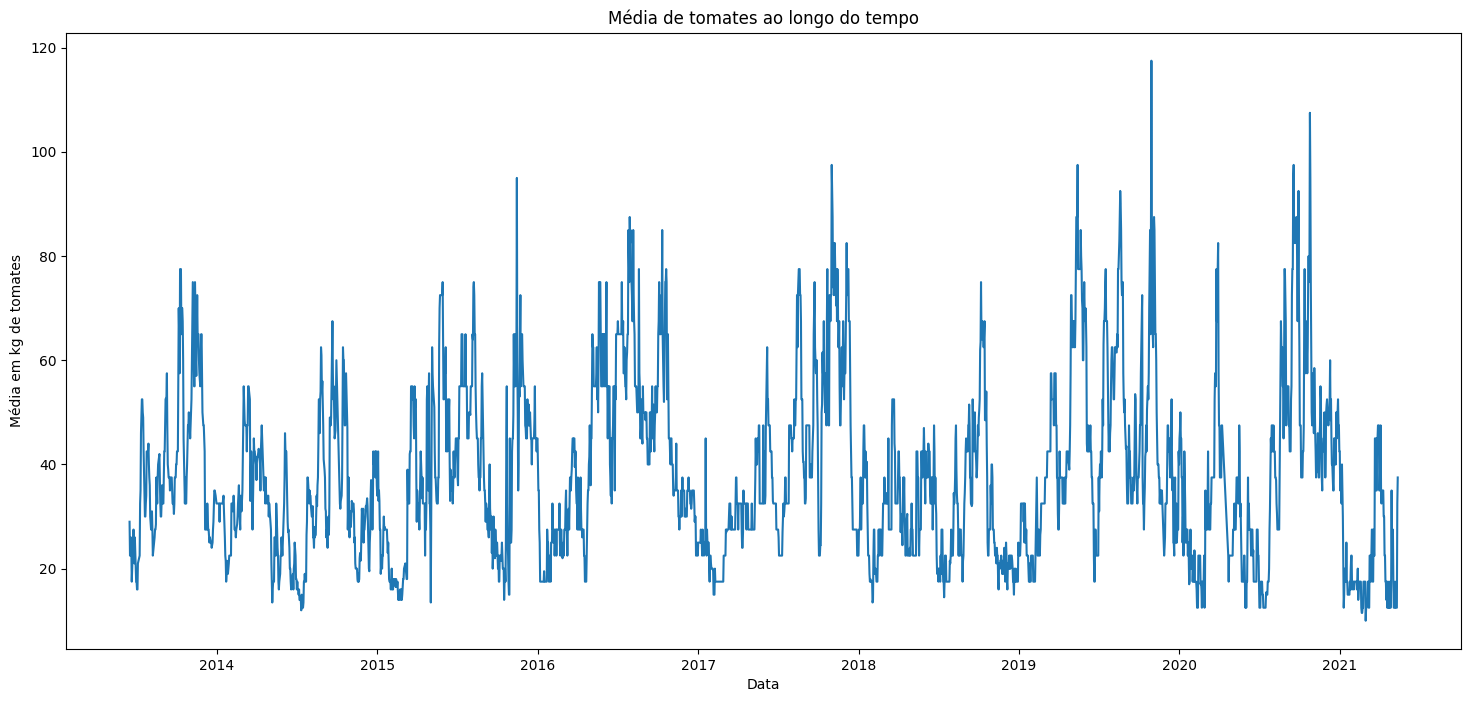

In [54]:
plt.figure(figsize=(18,8))
plt.plot(df_tomato['Date'], df_tomato['Average'])
plt.xlabel('Data')
plt.ylabel('Média em kg de tomates')
plt.title('Média de tomates ao longo do tempo')
plt.show()

In [55]:
df_chess = df_excel.copy()
df_chess.head()


,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,opening_eco,opening_name,opening_ply
0,False,1.504210e+17,1.504210e+17,13,outoftime,white,15+2,bourgris,1500,a-00,1191,D10,Slav Defense: Exchange Variation,5
1,True,1.504130e+17,1.504130e+17,16,resign,black,5+10,a-00,1322,skinnerua,1261,B00,Nimzowitsch Defense: Kennedy Variation,4
2,True,1.504130e+17,1.504130e+17,61,mate,white,5+10,ischia,1496,a-00,1500,C20,King's Pawn Game: Leonardis Variation,3
3,True,1.504110e+17,1.504110e+17,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,D02,Queen's Pawn Game: Zukertort Variation,3
4,True,1.504030e+17,1.504030e+17,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,C41,Philidor Defense,5


#### Scatter chart

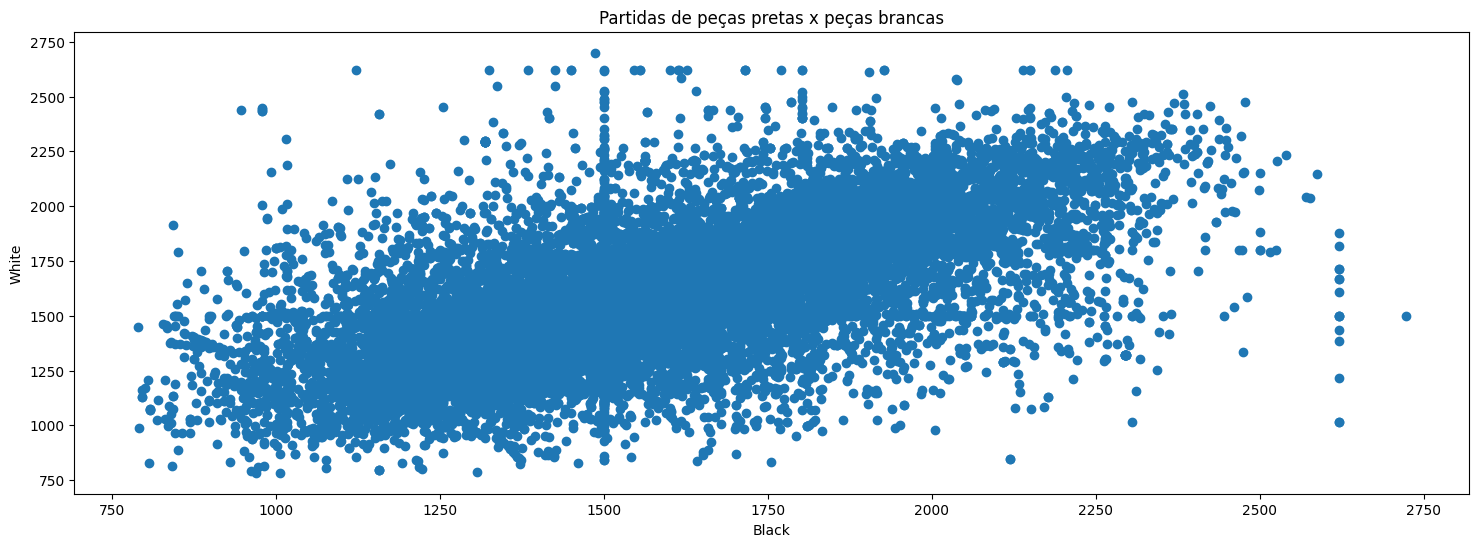

In [56]:
plt.figure(figsize=(18,6))
plt.scatter(df_chess['black_rating'], df_chess['white_rating'])
plt.xlabel('Black')
plt.ylabel('White')
plt.title('Partidas de peças pretas x peças brancas')
plt.show()

#### Bar chart

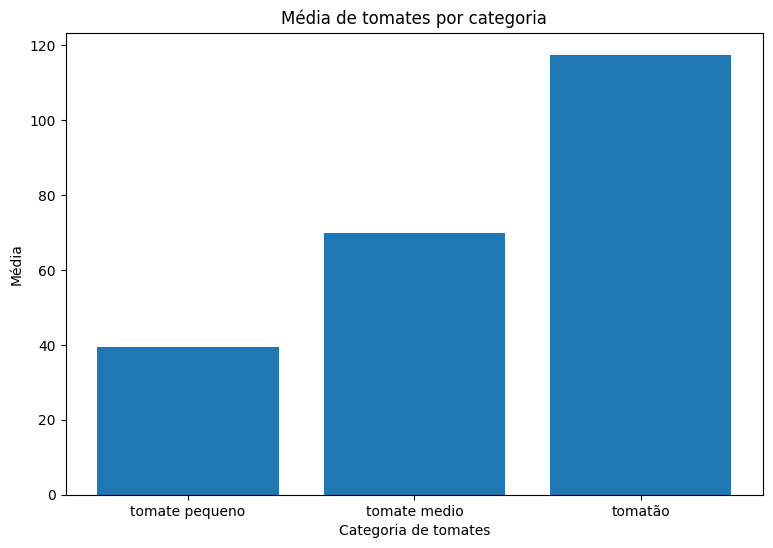

In [57]:
plt.figure(figsize=(9,6))
plt.bar(df_tomato['categoria_tomate'], df_tomato['Average'])
plt.xlabel('Categoria de tomates')
plt.ylabel('Média')
plt.title('Média de tomates por categoria')
plt.show()

#### Pie chart

C:\Users\User\AppData\Local\Temp\ipykernel_1364\3932742607.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_chess.groupby(['victory_status']).mean().plot(kind='pie', y='turns', autopct="%1.0f%%", figsize=(8,8))


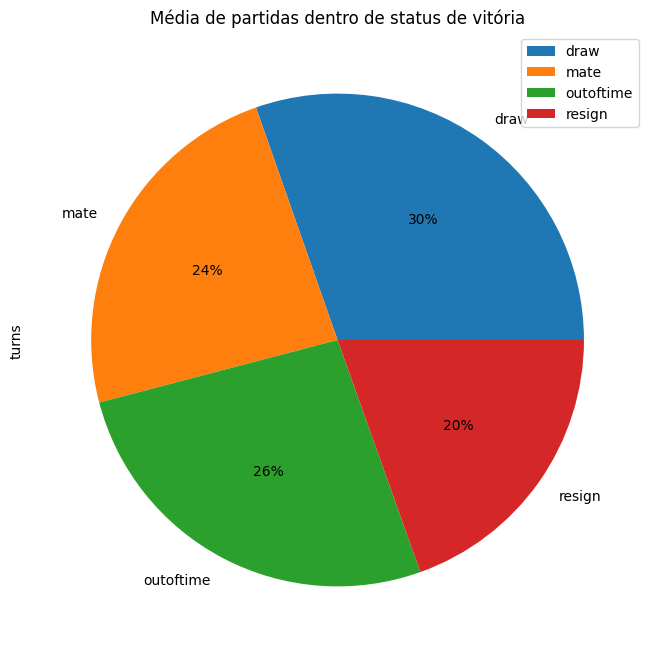

In [58]:
# plt.figure(figsize=(20,20))
df_chess.groupby(['victory_status']).mean().plot(kind='pie', y='turns', autopct="%1.0f%%", figsize=(8,8))
plt.title('Média de partidas dentro de status de vitória')
plt.show()

***

### Scikit-Learn

In [59]:
df_diabetes = pd.read_csv('../data/diabetes.csv')
df_diabetes.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Separando variável alvo (target) e variáveis de treino (com as características).

In [60]:
x = df_diabetes.drop(['Class variable'], axis=1)
y = df_diabetes['Class variable']

Separando base de treino e base de teste

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [62]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((537, 8), (231, 8), (537,), (231,))

Modelo: KNeighborsClassifier

In [63]:
knn = KNeighborsClassifier(n_neighbors=3)

Treinando o modelo

In [64]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Testando o modelo

In [65]:
accuracy = knn.score(x_test, y_test)
accuracy

0.7229437229437229

## AULA 03 - ANÁLISE EXPLORATÓRIA DE DADOS (EDA)

### Need to know

#### Processo de EDA simplificado
1. Importar o conjunto de dados;
2. Entender a composição da nossa base de dados;
3. Preprarar a nossa base de dados para leitura e compreensão;
4. Realizar análises estatísticas preliminares - Análise Descritiva;
5. Compreender as variáveis;
6. Estudo das relações entre as variáveis;
7. Insights (Debate e Conclusões).

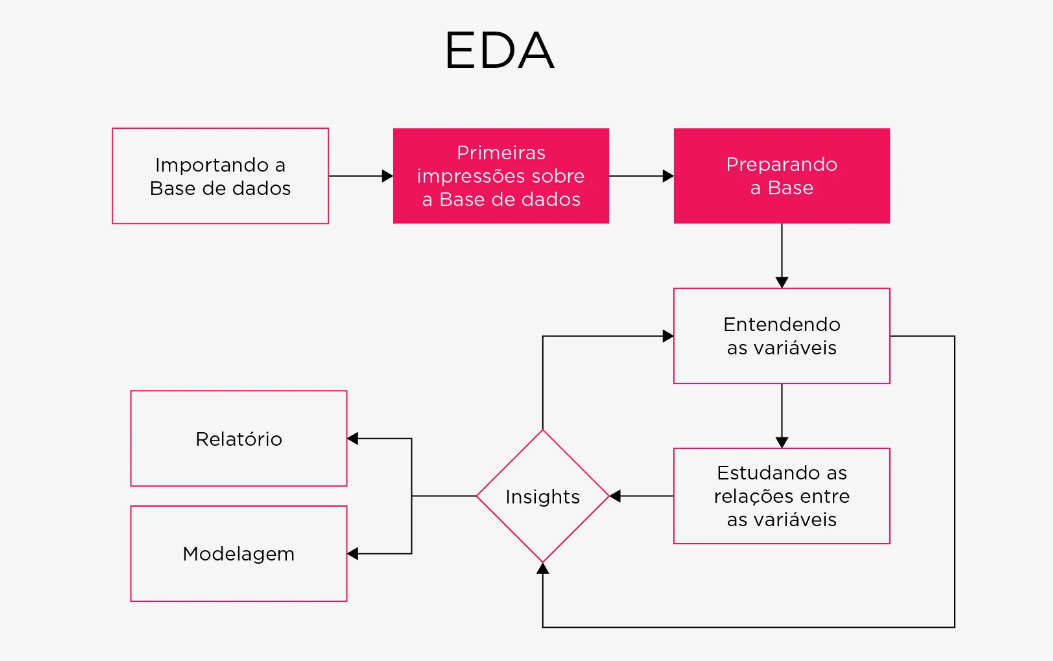

In [66]:
Image(filename='../images/eda-process.PNG')

#### Use case
Dados do spotify da banda **Rolling Stones** para fazer uma análise exploratória de dados (EDA)

In [67]:
df = pd.read_excel('../data/dataset_rolling_stones.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              1610 non-null   object        
 1   album             1610 non-null   object        
 2   release_date      1610 non-null   datetime64[ns]
 3   track_number      1610 non-null   int64         
 4   acousticness      1610 non-null   float64       
 5   danceability      1610 non-null   float64       
 6   energy            1610 non-null   float64       
 7   instrumentalness  1610 non-null   float64       
 8   liveness          1610 non-null   float64       
 9   loudness          1610 non-null   float64       
 10  speechiness       1610 non-null   float64       
 11  tempo             1610 non-null   float64       
 12  valence           1610 non-null   float64       
 13  popularity        1610 non-null   int64         
 14  duration_ms       1610 n

Data do primeiro album

In [68]:
print('Data Inicial: ', df['release_date'].min())

Data Inicial:  1964-04-16 00:00:00


Data do último album

In [69]:
print('Data Final: ', df['release_date'].max())

Data Final:  2022-06-10 00:00:00


Verificando nulos

In [70]:
df.isnull().sum()

name                0
album               0
release_date        0
track_number        0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

Verificando duplicados

In [71]:
df.duplicated().sum()

6

In [72]:
df[df.duplicated()]

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
928,Some Girls - Remastered,Some Girls (Deluxe Version),1978-06-09,4,0.5270,0.474,0.938,0.520000,0.299,-2643.0,0.0898,71995.00,0.505,21,276933
929,Lies - Remastered,Some Girls (Deluxe Version),1978-06-09,5,0.4370,0.382,0.997,0.950000,0.617,-1568.0,0.1880,162428.00,0.563,16,191266
935,Claudine,Some Girls (Deluxe Version),1978-06-09,1,0.0144,0.439,0.977,0.022100,0.383,-4386.0,0.1280,105124.00,0.364,17,222253
939,No Spare Parts,Some Girls (Deluxe Version),1978-06-09,5,0.2400,0.594,0.762,0.000015,0.712,-5145.0,0.0292,72648.00,0.540,19,270466
940,Don't Be A Stranger,Some Girls (Deluxe Version),1978-06-09,6,0.0610,0.720,0.867,0.029700,0.385,-5871.0,0.0390,127329.00,0.847,15,246266
946,Petrol Blues,Some Girls (Deluxe Version),1978-06-09,12,0.7690,0.835,0.621,0.114000,0.116,-8007.0,0.0406,115.87,0.336,13,95626


Analisando numeros

In [73]:
df.describe()

,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
count,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.00000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,8.613665,0.250475,0.468860,0.792352,0.164170,0.49173,-6406.640075,0.069512,114078.725261,0.582165,20.788199,257736.488199
std,6.560220,0.227397,0.141775,0.179886,0.276249,0.34910,3474.285941,0.051631,46196.602233,0.231253,12.426859,108333.474920
min,1.000000,0.000009,0.104000,0.141000,0.000000,0.02190,-24408.000000,0.023200,65.990000,0.000000,0.000000,21000.000000
25%,4.000000,0.058350,0.362250,0.674000,0.000219,0.15300,-8829.500000,0.036500,98996.500000,0.404250,13.000000,190613.000000
50%,7.000000,0.183000,0.458000,0.848500,0.013750,0.37950,-6179.000000,0.051200,120319.000000,0.583000,20.000000,243093.000000
75%,11.000000,0.403750,0.578000,0.945000,0.179000,0.89375,-4254.750000,0.086600,140853.750000,0.778000,27.000000,295319.750000
max,47.000000,0.994000,0.887000,0.999000,0.996000,0.99800,-2.310000,0.624000,216304.000000,0.974000,80.000000,981866.000000


Convertendo mili-segundos para minutos


In [74]:
df['duracao_em_min'] = df['duration_ms'] / 60000
df.head()

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duracao_em_min
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996000,0.932,-12913.0,0.1100,118001.0,0.0302,33,48640,0.810667
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233000,0.961,-4803.0,0.0759,131455.0,0.3180,34,253173,4.219550
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.969,0.400000,0.956,-4936.0,0.1150,130066.0,0.3130,34,263160,4.386000
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,0.5670,0.369,0.985,0.000107,0.895,-5535.0,0.1930,132994.0,0.1470,32,305880,5.098000
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,0.4000,0.303,0.969,0.055900,0.966,-5098.0,0.0930,130533.0,0.2060,32,305106,5.085100


In [75]:
df.describe()

,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duracao_em_min
count,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.00000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,8.613665,0.250475,0.468860,0.792352,0.164170,0.49173,-6406.640075,0.069512,114078.725261,0.582165,20.788199,257736.488199,4.295608
std,6.560220,0.227397,0.141775,0.179886,0.276249,0.34910,3474.285941,0.051631,46196.602233,0.231253,12.426859,108333.474920,1.805558
min,1.000000,0.000009,0.104000,0.141000,0.000000,0.02190,-24408.000000,0.023200,65.990000,0.000000,0.000000,21000.000000,0.350000
25%,4.000000,0.058350,0.362250,0.674000,0.000219,0.15300,-8829.500000,0.036500,98996.500000,0.404250,13.000000,190613.000000,3.176883
50%,7.000000,0.183000,0.458000,0.848500,0.013750,0.37950,-6179.000000,0.051200,120319.000000,0.583000,20.000000,243093.000000,4.051550
75%,11.000000,0.403750,0.578000,0.945000,0.179000,0.89375,-4254.750000,0.086600,140853.750000,0.778000,27.000000,295319.750000,4.921996
max,47.000000,0.994000,0.887000,0.999000,0.996000,0.99800,-2.310000,0.624000,216304.000000,0.974000,80.000000,981866.000000,16.364433


Média de minutos por album

In [76]:
df.groupby('album')['duracao_em_min'].mean()

album
12 X 5                              2.682068
12 x 5                              2.682772
A Bigger Bang (2009 Re-Mastered)    4.016356
A Bigger Bang (Live)                5.176630
Aftermath                           3.899185
                                      ...   
Undercover                          4.492750
Undercover (2009 Re-Mastered)       4.497595
Voodoo Lounge (Remastered 2009)     4.118779
Voodoo Lounge Uncut (Live)          5.248507
got LIVE if you want it!            2.762532
Name: duracao_em_min, Length: 90, dtype: float64

Média de minutos por album ordenada

In [77]:
df_maior_duracao_musica = df.groupby('album')['duracao_em_min'].mean().sort_values(ascending=False)
df_maior_duracao_musica

album
Havana Moon (Live)                                                      6.632819
Bridges To Bremen (Live)                                                6.332265
Jamming With Edward                                                     6.042794
Live At The Checkerboard Lounge                                         6.009647
Totally Stripped - Paris (Live)                                         5.947430
                                                                          ...   
Out Of Our Heads (UK)                                                   2.464643
Out Of Our Heads (UK Sequence)                                          2.449274
December's Children (and everybody's)                                   2.408976
December’s Children (And Everybody’s)                                   2.408532
Live 1965: Music From Charlie Is My Darling (Live From England/1965)    2.146082
Name: duracao_em_min, Length: 90, dtype: float64

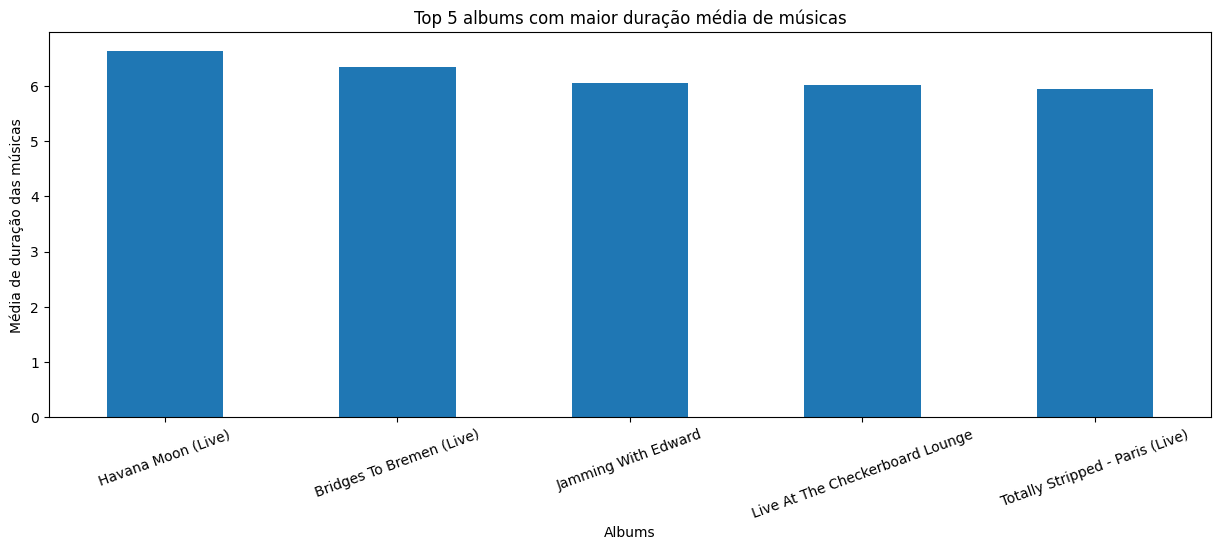

In [78]:
plt.figure(figsize=(15,5))
df_maior_duracao_musica.head(5).plot(kind='bar', rot=20)
plt.xlabel('Albums')
plt.ylabel('Média de duração das músicas')
plt.title('Top 5 albums com maior duração média de músicas')
plt.show()

Top albums - contagem de músicas

In [79]:
top_albums = df['album'].value_counts().head(10)
top_albums

Voodoo Lounge Uncut (Live)         56
Honk (Deluxe)                      47
Live Licks                         46
Tattoo You (Super Deluxe)          46
Some Girls (Deluxe Version)        44
Goats Head Soup (Deluxe)           37
Flashpoint                         34
Sticky Fingers (Super Deluxe)      33
On Air (Deluxe)                    32
Live At The Checkerboard Lounge    32
Name: album, dtype: int64

Text(0.5, 1.0, 'Top 10 albums com mais músicas')

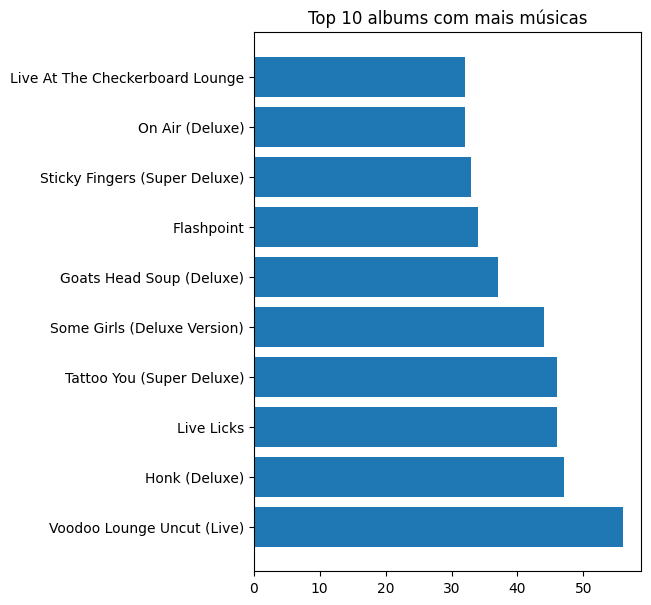

In [80]:
plt.figure(figsize=(5,7))
plt.barh(top_albums.index, top_albums.values)
plt.title('Top 10 albums com mais músicas')

Entendendo popularidade da banda na última decada

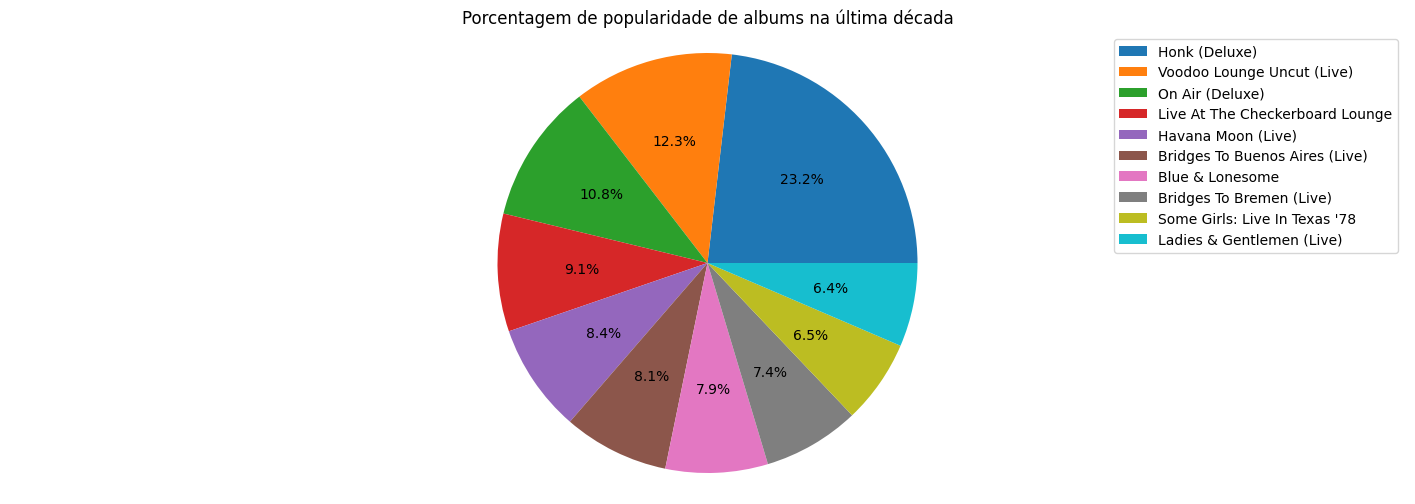

In [81]:
# Filtrando dados
df_ultima_decada = df[df['release_date'].between(pd.to_datetime('2011'), pd.to_datetime('2020'))]

# Pegando top 10 no quesito popularidade
df_por_album = df_ultima_decada.groupby('album')['popularity'].sum().sort_values(ascending=False).head(10)

# Pegando numeros para facilitar o grafico, criando porcentagem
total_popularidade = df_por_album.sum()
df_porcentagem = df_por_album / total_popularidade * 100

# Selecionando informações para colocar no gráfico
labels = df_porcentagem.index.tolist()
sizes = df_porcentagem.values.tolist()

# Criando gráfico
figure, grafico = plt.subplots(figsize=(18,6))
grafico.pie(sizes, autopct='%1.1f%%')
grafico.axis('equal')
plt.title('Porcentagem de popularidade de albums na última década')
plt.legend(labels, loc='best')
plt.show()

***

### Outliers

Visuaizando outliers com boxplot

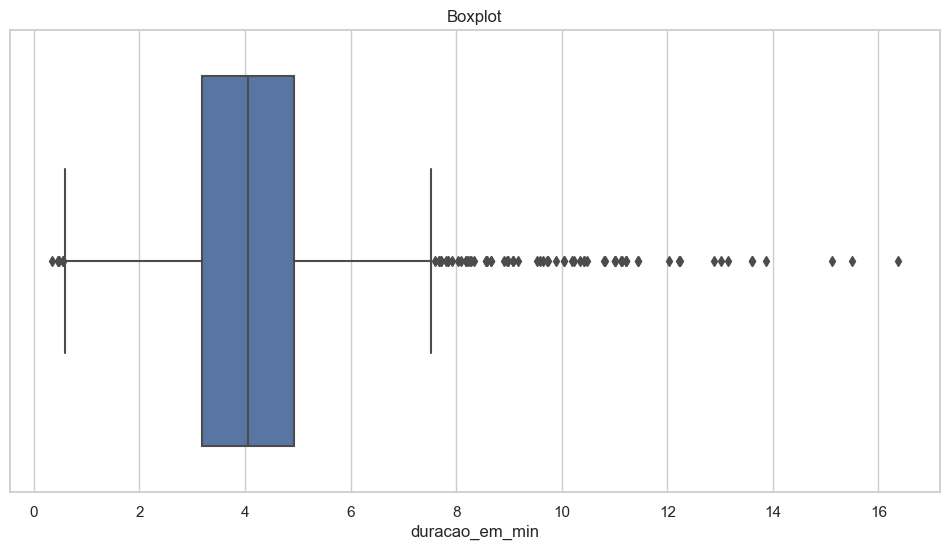

In [82]:
sns.set(style='whitegrid')
fig, axes = plt.subplots(figsize=(12, 6))
sns.boxplot(x='duracao_em_min', data=df)
axes.set_title('Boxplot')
plt.show()

Usando o grafico de "Violino"

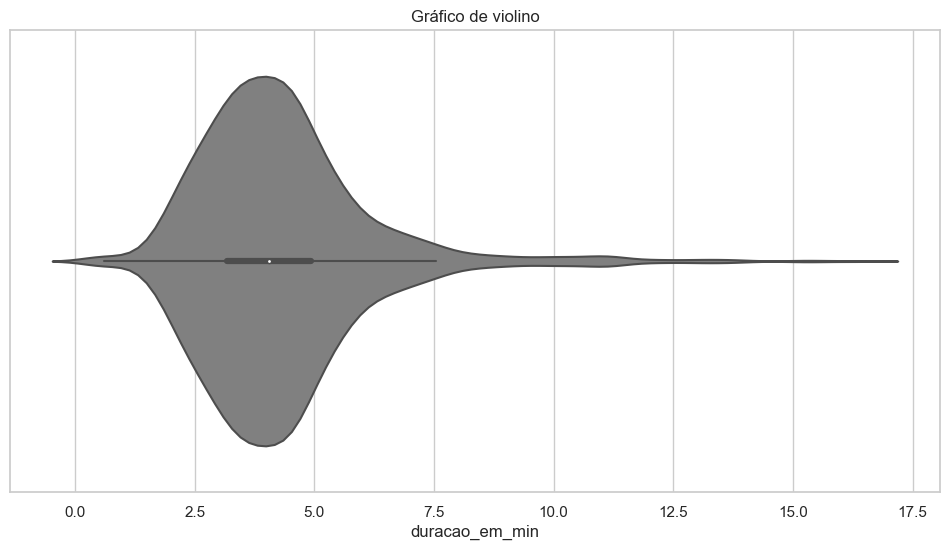

In [83]:
fig, axes = plt.subplots(figsize=(12,6))
sns.violinplot(x='duracao_em_min', data=df, color='gray')
axes.set_title('Gráfico de violino')
plt.show()

Usando boxplot e violine

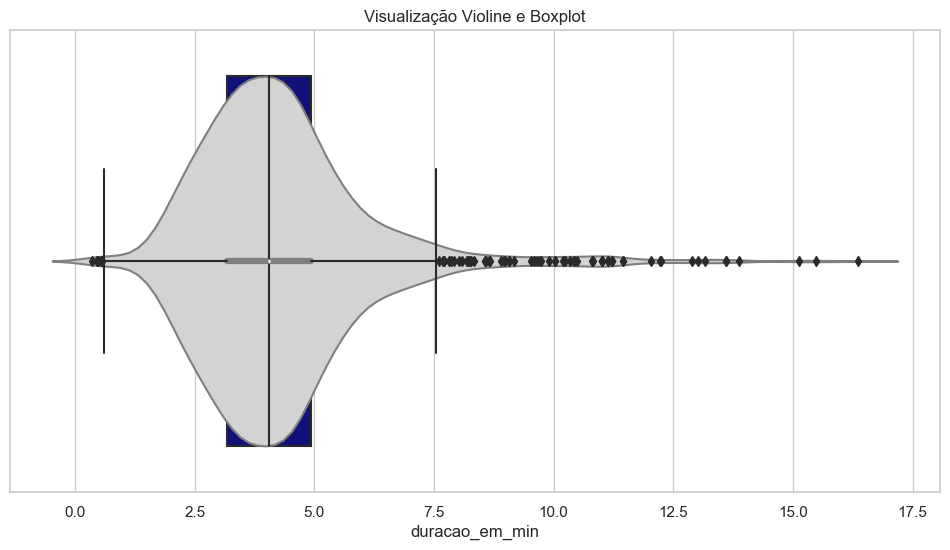

In [84]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.violinplot(x='duracao_em_min', data=df, ax=ax, color='lightgray')
sns.boxplot(x='duracao_em_min', data=df, ax=ax, whis=1.5, color='darkblue')
ax.set_title('Visualização Violine e Boxplot')
plt.show()

Analisando conteúdo de shows "ao vivo"

In [85]:
def classifica_musica_ao_vivo(df):
    if df['liveness'] >= 0.8:
        return True
    else:
        return False

In [86]:
df['ao_vivo'] = df.apply(classifica_musica_ao_vivo, axis=1)

In [87]:
df.groupby('ao_vivo')['ao_vivo'].count()

ao_vivo
False    1112
True      498
Name: ao_vivo, dtype: int64

In [88]:
df_gravado_em_studio = df[df['ao_vivo'] == False]
df_show_ao_vivo = df[df['ao_vivo'] == True]

In [89]:
print('Média das músicas ao vivo: ', df_show_ao_vivo['duracao_em_min'].mean())

Média das músicas ao vivo:  5.088648962516734


In [90]:
print('Média das músicas em studio: ', df_gravado_em_studio['duracao_em_min'].mean())

Média das músicas em studio:  3.940451363908873


Usando o grafico de "Histograma"

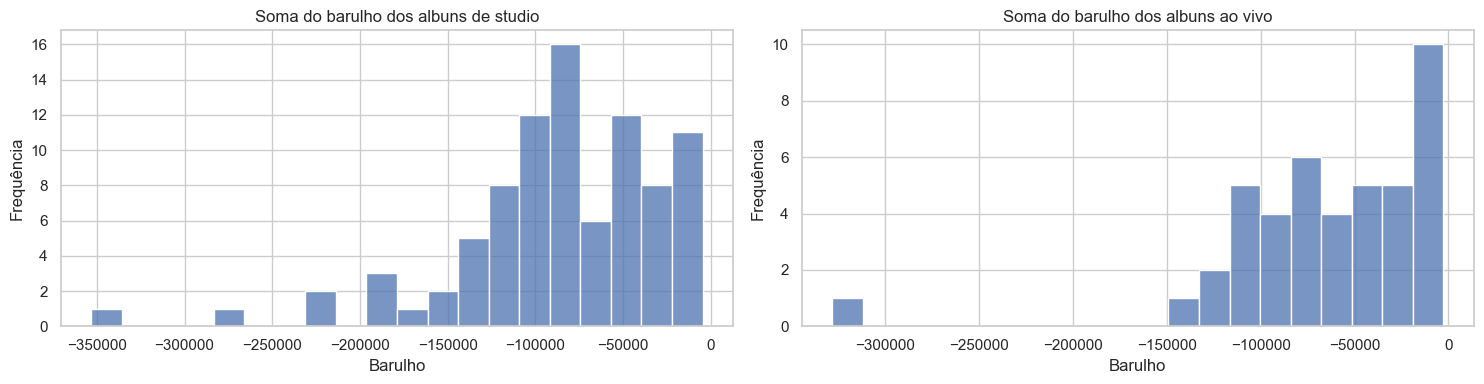

In [91]:
df_studio = df_gravado_em_studio.groupby('album')['loudness'].sum()
df_ao_vivo = df_show_ao_vivo.groupby('album')['loudness'].sum()

fig, axes = plt.subplots(1, 2, figsize=(15,4))

sns.histplot(data=df_studio, bins=20, ax=axes[0])
axes[0].set_title('Soma do barulho dos albuns de studio')
axes[0].set_xlabel('Barulho')
axes[0].set_ylabel('Frequência')

sns.histplot(data=df_ao_vivo, bins=20, ax=axes[1])
axes[1].set_title('Soma do barulho dos albuns ao vivo')
axes[1].set_xlabel('Barulho')
axes[1].set_ylabel('Frequência')

fig.tight_layout()
plt.show()

Usando o grafico de "Densidade"

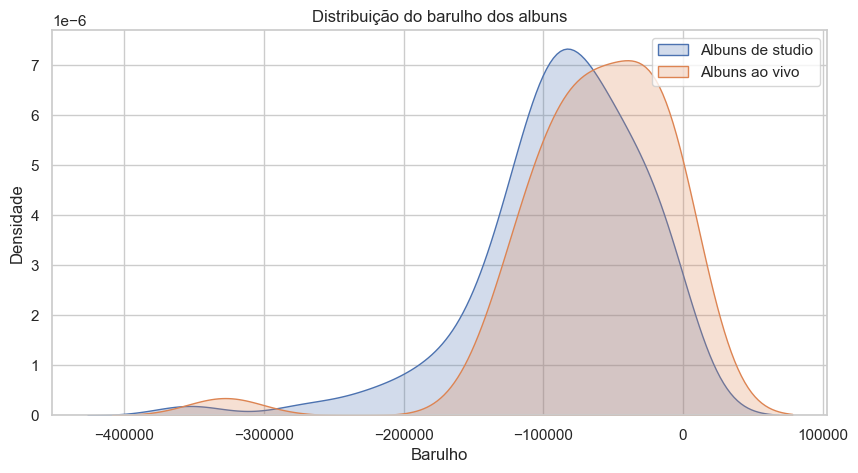

In [92]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=df_studio, label='Albuns de studio', fill=True)
sns.kdeplot(data=df_ao_vivo, label='Albuns ao vivo', fill=True)

plt.title('Distribuição do barulho dos albuns')
plt.xlabel('Barulho')
plt.ylabel('Densidade')
plt.legend()
plt.show()

Analisando se a distribuição é "normal" usando o método/teste de **shapiro**

In [93]:
stat, p = shapiro(df_studio)
print(f'Soma do barulho dos albuns de studio:')
print('Estatística de teste: {:.4f}, p: {}'.format(stat, p))

if p > 0.05:
    print(f'Não há evidência suficiente para rejeitar a hipótese de normalidade - É NORMAL')
else:
    print('A hipótese de normalidade é rejeitada - NÃO É NORMAL')

Soma do barulho dos albuns de studio:
Estatística de teste: 0.8958, p: 3.2961095257633133e-06
A hipótese de normalidade é rejeitada - NÃO É NORMAL


In [94]:
stat, p = shapiro(df_ao_vivo)
print(f'Soma do barulho dos albuns ao vivo:')
print('Estatística de teste: {:.4f}, p: {}'.format(stat, p))

if p > 0.05:
    print(f'Não há evidência suficiente para rejeitar a hipótese de normalidade - É NORMAL')
else:
    print('A hipótese de normalidade é rejeitada - NÃO É NORMAL')

Soma do barulho dos albuns ao vivo:
Estatística de teste: 0.7913, p: 2.35057973441144e-06
A hipótese de normalidade é rejeitada - NÃO É NORMAL


Analisando a diferença entre duas distribuições de dados usando o método/teste de **mannwhitneyu**

In [95]:
stat, p = mannwhitneyu(df_studio.sample(len(df_studio)),
                       df_ao_vivo.sample(len(df_ao_vivo)),
                       alternative='less')

print(f'Estatística de teste U: {stat}')                       
print(f'Valor p: {p}')

alpha = 0.05

if p < alpha:
    print('Diferença estatisticamente significante')
else:
    print('Não há diferença estatísticamente significante')

Estatística de teste U: 1367.0
Valor p: 0.0050727361177996585
Diferença estatisticamente significante


Análise de **Correlação**

In [96]:
media_por_album = df.groupby('album')['valence'].mean().reset_index()
media_por_album = media_por_album.rename(columns={'valence': 'media_valence'})
media_por_album['sentimento'] = ['positivo' if v > 0.6 else 'negativo' for v in media_por_album['media_valence']]
media_por_album.groupby('sentimento')['sentimento'].count()

sentimento
negativo    38
positivo    52
Name: sentimento, dtype: int64

Matriz de correlação

In [97]:
df_resultado_final = pd.merge(df,
                              media_por_album,
                              on='album')
df_resultado_final.head(2)                              

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duracao_em_min,ao_vivo,media_valence,sentimento
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996,0.932,-12913.0,0.1100,118001.0,0.0302,33,48640,0.810667,True,0.27117,negativo
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233,0.961,-4803.0,0.0759,131455.0,0.3180,34,253173,4.219550,True,0.27117,negativo


In [98]:
matriz_correlação = df_resultado_final.corr()
correlacao_sentimento = matriz_correlação['media_valence']
display(correlacao_sentimento)

C:\Users\User\AppData\Local\Temp\ipykernel_1364\257514235.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlação = df_resultado_final.corr()


track_number       -0.115007
acousticness        0.015491
danceability        0.492945
energy             -0.347447
instrumentalness    0.133741
liveness           -0.571749
loudness           -0.229543
speechiness        -0.416005
tempo              -0.028887
valence             0.603258
popularity          0.100509
duration_ms        -0.309499
duracao_em_min     -0.309499
ao_vivo            -0.549736
media_valence       1.000000
Name: media_valence, dtype: float64

Heatmap dos dados de correlação

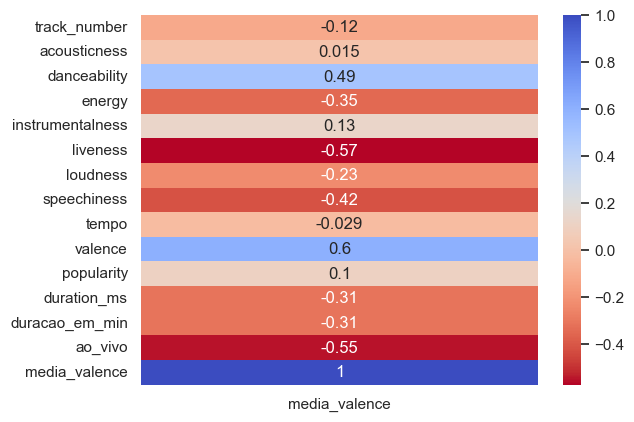

In [99]:
sns.heatmap(correlacao_sentimento.to_frame(), annot=True, cmap='coolwarm_r')
plt.show()

Análisando correlação de 2 variáveis com **scatterplot** (gráfico de dispersão)

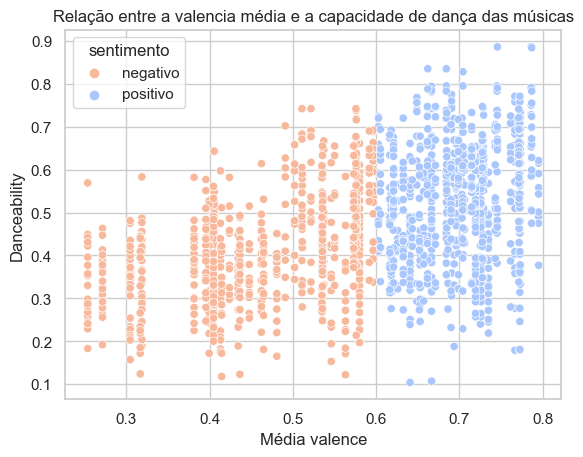

In [100]:
sns.scatterplot(x='media_valence', y='danceability', hue='sentimento', data=df_resultado_final, palette='coolwarm_r')
plt.xlabel('Média valence')
plt.ylabel('Danceability')
plt.title('Relação entre a valencia média e a capacidade de dança das músicas')
plt.show()

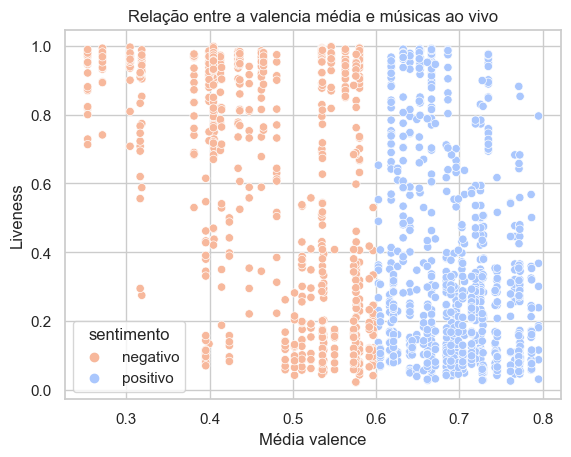

In [101]:
sns.scatterplot(x='media_valence', y='liveness', hue='sentimento', data=df_resultado_final, palette='coolwarm_r')
plt.xlabel('Média valence')
plt.ylabel('Liveness')
plt.title('Relação entre a valencia média e músicas ao vivo')
plt.show()

***

## AULA 04 - FEATURE ENGINEERING

### Need to know

### Normalização / Padronização

In [102]:
dados = pd.read_csv('../data/data.csv', sep=',')
dados.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


#### Matriz de correlação
para entender as relações entre as variaveis

C:\Users\User\AppData\Local\Temp\ipykernel_1364\4230162225.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dados.corr().round(2)


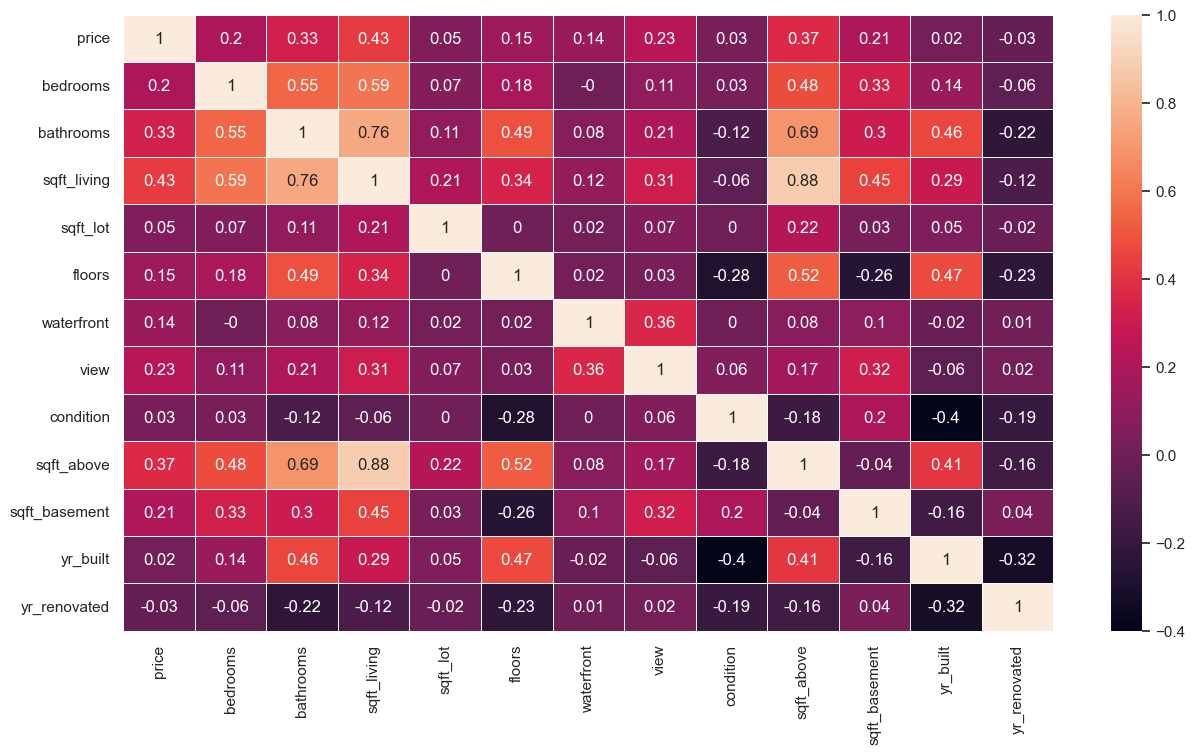

In [103]:
correlation_matrix = dados.corr().round(2)

fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)
plt.show()

- Analisando se as variaveis **sqft_living** e **bathrooms** de fato se correlacionam com a variavel target **price**
- entendendo as escalas

Graficos de dispersão

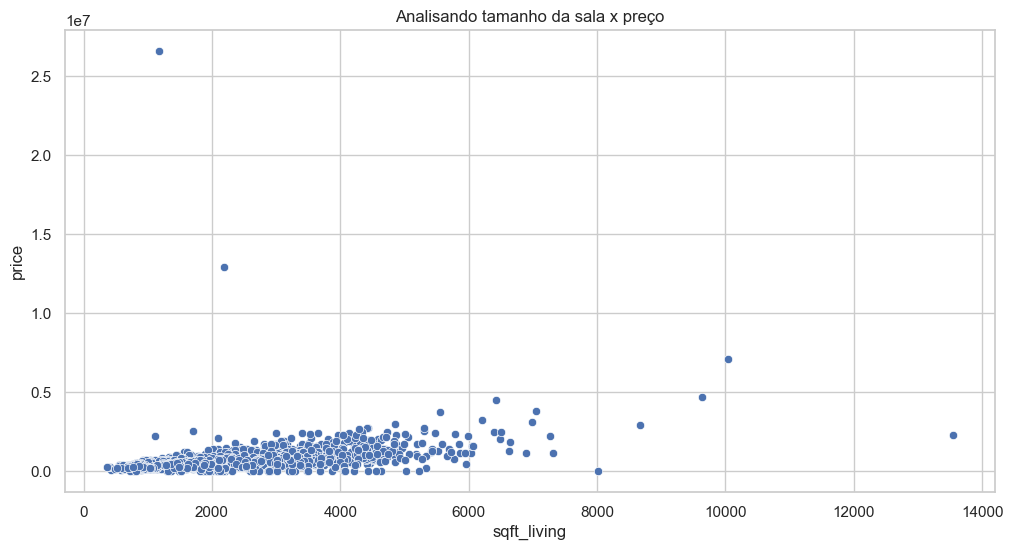

In [104]:
x = dados[['sqft_living', 'bathrooms']].values
y = dados['price'].values

plt.figure(figsize=(12,6))
sns.scatterplot(data=dados, x='sqft_living', y='price')
plt.title('Analisando tamanho da sala x preço')
plt.show()

Podemos ver alguns outliers, nada conclusivo

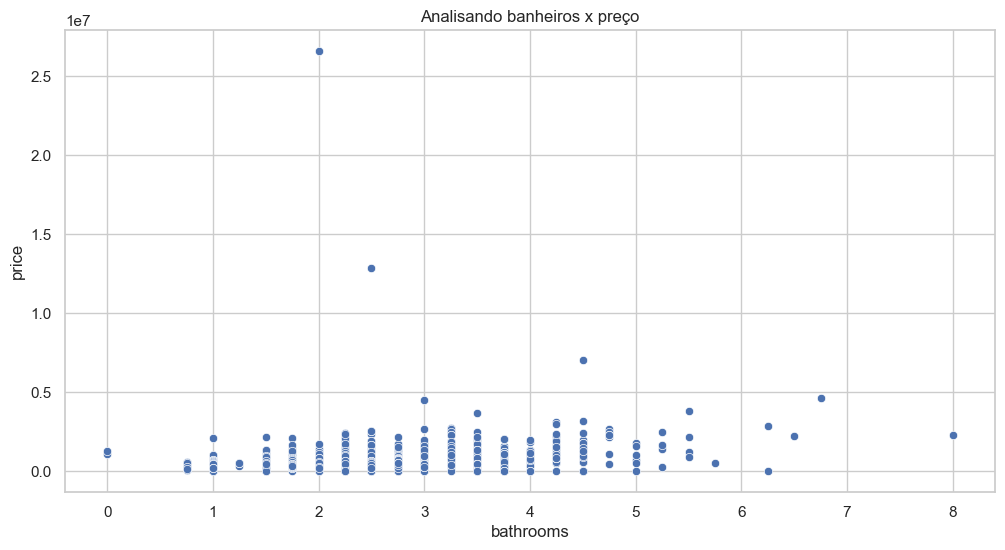

In [105]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=dados, x='bathrooms', y='price')
plt.title('Analisando banheiros x preço')
plt.show()

Tentandoa analisar as duas variaveis contra o preço, no mesmo gráfico

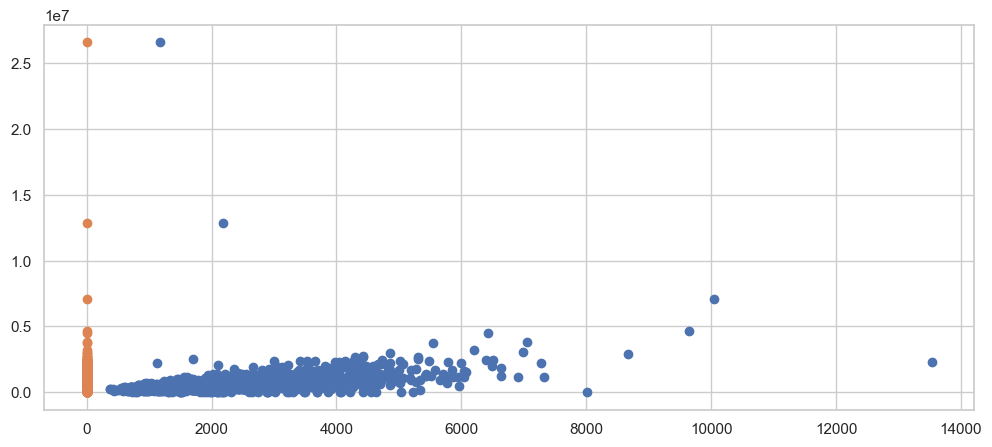

In [106]:
fig, ax = plt.subplots(figsize=(12,5))

ax.scatter(x[:,0], y)
ax.scatter(x[:,1], y)

Vemos que as escalas impactam e tornam a analise dificil, é necessario normalizar

Analisando a distribuição dos dados nas variaveis:

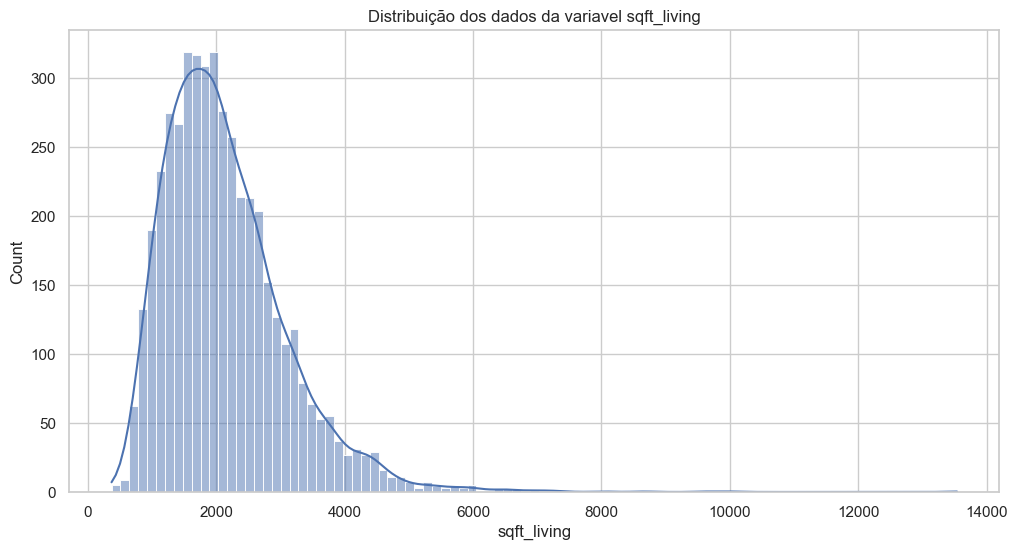

In [107]:
plt.figure(figsize=(12,6))
sns.histplot(data=dados, x='sqft_living', kde=True)
plt.title('Distribuição dos dados da variavel sqft_living')
plt.show()

resultado do grafico acima: sqft_living -> distribuição assimetrica, outliers presentes nas pontas

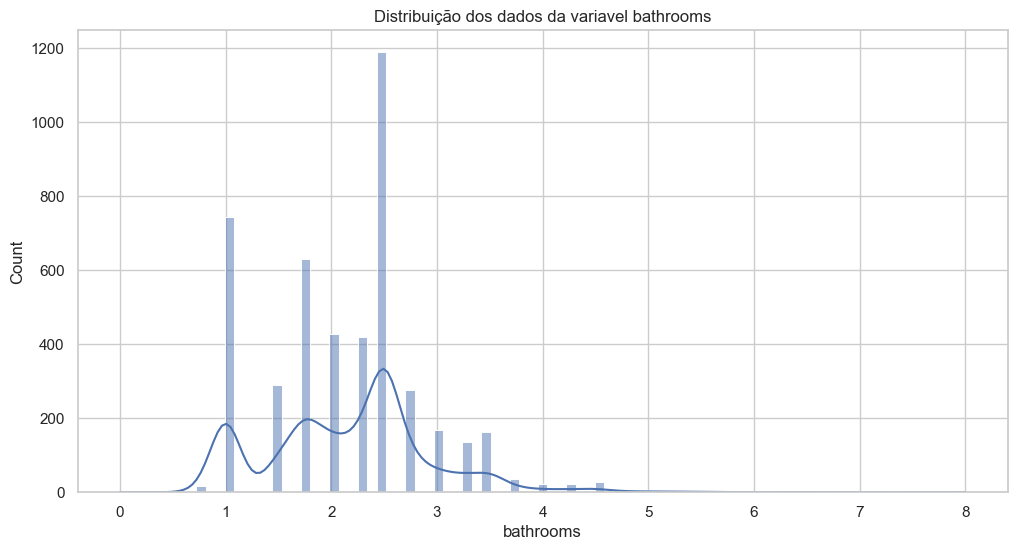

In [108]:
plt.figure(figsize=(12,6))
sns.histplot(data=dados, x='bathrooms', kde=True)
plt.title('Distribuição dos dados da variavel bathrooms')
plt.show()

Resultado do grafico acima: 
- totalmente diferente da distribuição do sqft_living, distribuição assimétrica.
- INCONCLUSIVO, não nos traz nada

Se colocar os dois juntos, pior ainda

Grafico de frequencia

<Axes: >

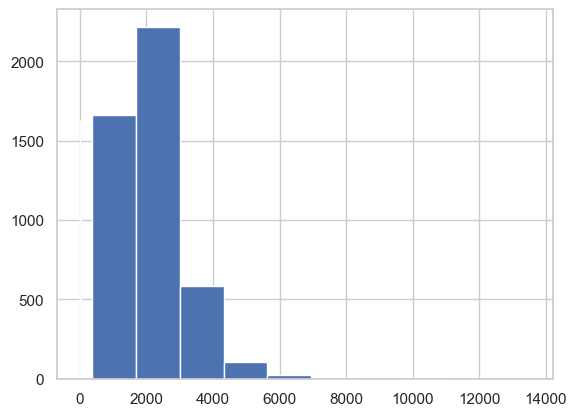

In [109]:
hist_variaveis = pd.DataFrame(dados, columns=['sqft_living', 'bathrooms'])

hist_variaveis.sqft_living.hist()
hist_variaveis.bathrooms.hist()

Inconclusivo, dois historigramas um em cima do outro, não da pra ver o de baixo e as escalas são diferentes

#### StandardScaler
- Padronização: a média dos dados em zero, e o desvio padrão com unitário (1), colocando os dados na mesma régua

In [110]:
scaler = StandardScaler()
x_std = scaler.fit_transform(x) #normalizando

Vamos normalizar as duas variaveis que tem escalas completamente diferentes, sqft_living e bathrooms

fazer o mesmo grafico de antes, que era inconclusivo

In [111]:
x_std # EM TEORIA, DADOS NORMALIZADOS

array([[-0.82997105, -0.84320364],
       [ 1.56852826,  0.43280154],
       [-0.21736733, -0.20520105],
       ...,
       [ 0.90400897,  0.43280154],
       [-0.05123751, -0.20520105],
       [-0.67422434,  0.43280154]])

In [112]:
x_std = pd.DataFrame(x_std, columns=['sqt_living', 'bathrooms'])

<Axes: >

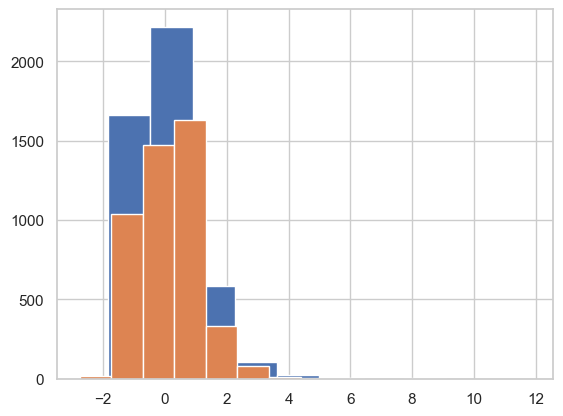

In [113]:
x_std.sqt_living.hist()
x_std.bathrooms.hist()

Principal diferença o eixo x normalizado, variande de -2 até 12 (coisa que antes era 0 até 14000)

#### Feature Scaling em modelos de machine learning
modelo de regressão linear

In [114]:
x = dados[['sqft_living', 'bathrooms']].values
y = dados['price'].values

Preparando dados de treino e teste

In [115]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=7)
len(x_train), len(x_test)

(3450, 1150)

Padronizando

Duvida: MinMaxScaler ou StandardScaler?

-> vai muito dos testes, analisar os graficos, histograma pré e pós normalização, se a representação estatistica (grafico) não muda, provavelmente não precise normalizar as escalas (mas na maioria dos casos sim).

In [116]:
# VISUALIZANDO O x_train ANTES de normalizar
x_train

array([[2.400e+03, 3.250e+00],
       [1.954e+03, 2.500e+00],
       [2.620e+03, 2.750e+00],
       ...,
       [3.490e+03, 3.750e+00],
       [2.380e+03, 2.500e+00],
       [1.790e+03, 2.500e+00]])

In [117]:
scaler = MinMaxScaler() # vamos optiar por esse para seguir com os estudos (escala vai ser normalizada para 0-1)
scaler.fit(x_train)

MinMaxScaler()

In [118]:
# APLICANDO A NORMALIZAÇÃO
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [119]:
# x_train PÓS NORMALIZAÇÃO (de 0 a 1)
x_train_scaled

array([[0.15349544, 0.40625   ],
       [0.11960486, 0.3125    ],
       [0.17021277, 0.34375   ],
       ...,
       [0.23632219, 0.46875   ],
       [0.15197568, 0.3125    ],
       [0.10714286, 0.3125    ]])

#### Criando o modelo

In [120]:
model = LinearRegression()
model.fit(x_train_scaled, y_train) # VARIAVEL y_train É A TARGET, NÃO PRECISA NORMALIZAR

LinearRegression()

In [121]:
y_pred = model.predict(x_test_scaled)

##### Avaliando modelo

In [122]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"R2: {r2}")

MAE: 173536.74188212887
R2: 0.460589559677016


**r2** -> quanto mais próximo de 1, melhor o modelo está performando

Criando um modelo com dados sem feature scaling

In [123]:
model_normal = LinearRegression()
model_normal.fit(x_train, y_train)

LinearRegression()

In [124]:
y_pred_normal = model_normal.predict(x_test)

In [125]:
mae = mean_absolute_error(y_test, y_pred_normal)
r2 = r2_score(y_test, y_pred_normal)

print(f"MAE: {mae}")
print(f"R2: {r2}")

MAE: 173536.74188212887
R2: 0.460589559677016


Conclusão: no modelo LinearRegression, estamos buscando encontrar a linearidade dos dados, então esse modelo (regressão linear) não se beneficia da normalização das escalas

se fosse modelos de categorização/classificação, muito provavelmente iria se beneficiar desse tipo de normalização

Tudo depende de **TESTES**

***

## AULA 05 - AVALIANDO O MELHOR MODELO DE REGRESSÃO

### Need to know

Lendo dados de imoveis

In [127]:
imoveis = pd.read_csv('../data/Valorizacao_Ambiental.csv', sep=';')
imoveis.head()

,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m
0,1,160000,168,1,5,1,1,294,1,0
1,2,67000,129,1,6,0,0,1505,1,0
2,3,190000,218,1,8,1,0,251,0,1
3,4,110000,180,12,4,1,0,245,0,0
4,5,70000,120,15,3,1,0,956,1,0


In [129]:
imoveis.shape

(172, 10)

In [130]:
imoveis.isnull().sum()

Ordem       0
Valor       0
Area        0
IA          0
Andar       0
Suites      0
Vista       0
DistBM      0
Semruido    0
AV100m      0
dtype: int64

In [132]:
imoveis.describe().round(2)

,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m
count,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00
mean,86.50,173541.95,163.20,5.65,4.30,1.40,0.14,505.89,0.58,0.35
std,49.80,99827.09,65.92,5.57,2.24,1.13,0.35,395.05,0.49,0.48
min,1.00,40000.00,69.00,1.00,1.00,0.00,0.00,73.00,0.00,0.00
25%,43.75,104750.00,117.00,1.00,2.75,1.00,0.00,214.75,0.00,0.00
50%,86.50,149000.00,145.00,2.50,4.00,1.00,0.00,402.50,1.00,0.00
75%,129.25,209250.00,182.00,11.00,6.00,2.00,0.00,638.00,1.00,1.00
max,172.00,579840.00,393.00,19.00,12.00,6.00,1.00,1859.00,1.00,1.00


Identificando a variabel target "Valor"

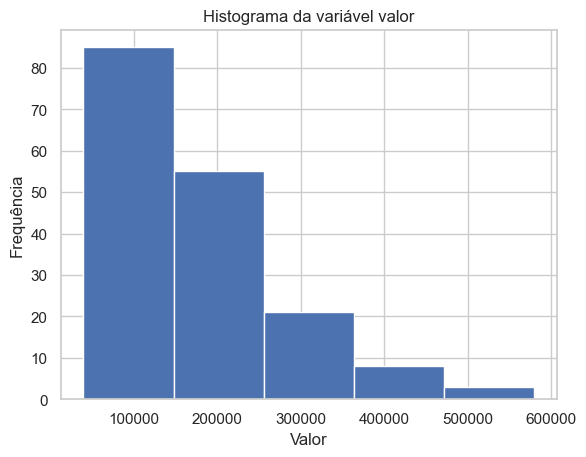

In [134]:
plt.hist(imoveis['Valor'], bins=5)
plt.ylabel('Frequência')
plt.xlabel('Valor')
plt.title('Histograma da variável valor')
plt.show()

pontos identificados do gráfico:
- assimétrico a esquerda
- valores até 100 maior frequência (mais imóveis até 100, mais "baratos")
- conforme o valor aumenta, tem menos imóveis

In [135]:
#Transformando os dados com a raiz quadrada dos valores para facilitar a analise exploratória da variavel target (sem mudar a representação estatistica)
imoveis['raiz_valor'] = np.sqrt(imoveis['Valor'])

In [136]:
imoveis

,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m,raiz_valor
0,1,160000,168,1,5,1,1,294,1,0,400.000000
1,2,67000,129,1,6,0,0,1505,1,0,258.843582
2,3,190000,218,1,8,1,0,251,0,1,435.889894
3,4,110000,180,12,4,1,0,245,0,0,331.662479
4,5,70000,120,15,3,1,0,956,1,0,264.575131
...,...,...,...,...,...,...,...,...,...,...,...
167,168,80000,82,14,2,0,0,485,1,0,282.842712
168,169,144000,134,11,2,0,1,827,1,1,379.473319
169,170,176000,135,9,3,2,1,414,1,1,419.523539
170,171,199956,141,1,6,2,0,305,0,0,447.164399


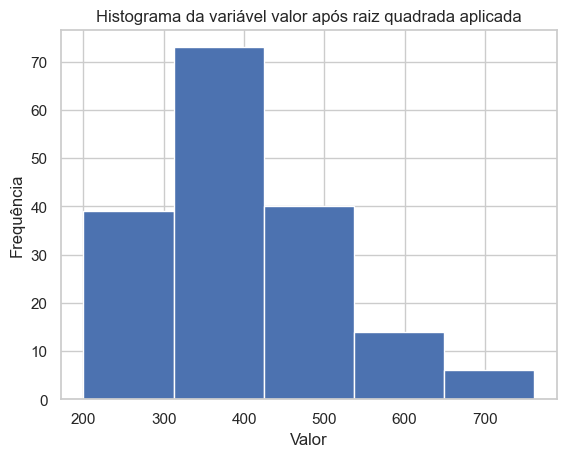

In [137]:
plt.hist(imoveis['raiz_valor'], bins=5)
plt.ylabel('Frequência')
plt.xlabel('Valor')
plt.title('Histograma da variável valor após raiz quadrada aplicada')
plt.show()

pontos identificados após transformação:
- ainda assimétrica a esquerda, mas "menos" assimétrica como antes, facilitando assim a visualização da frequência dos dados
- estão se comportando com a quantidade de imoveis nos intervalos de valores (transformados), não era possível visualizar os apartamentos de 600K por exemplo

Usando boxplot para avaliar variaveis quantitativas

Text(0, 0.5, 'Quantidade de suites')

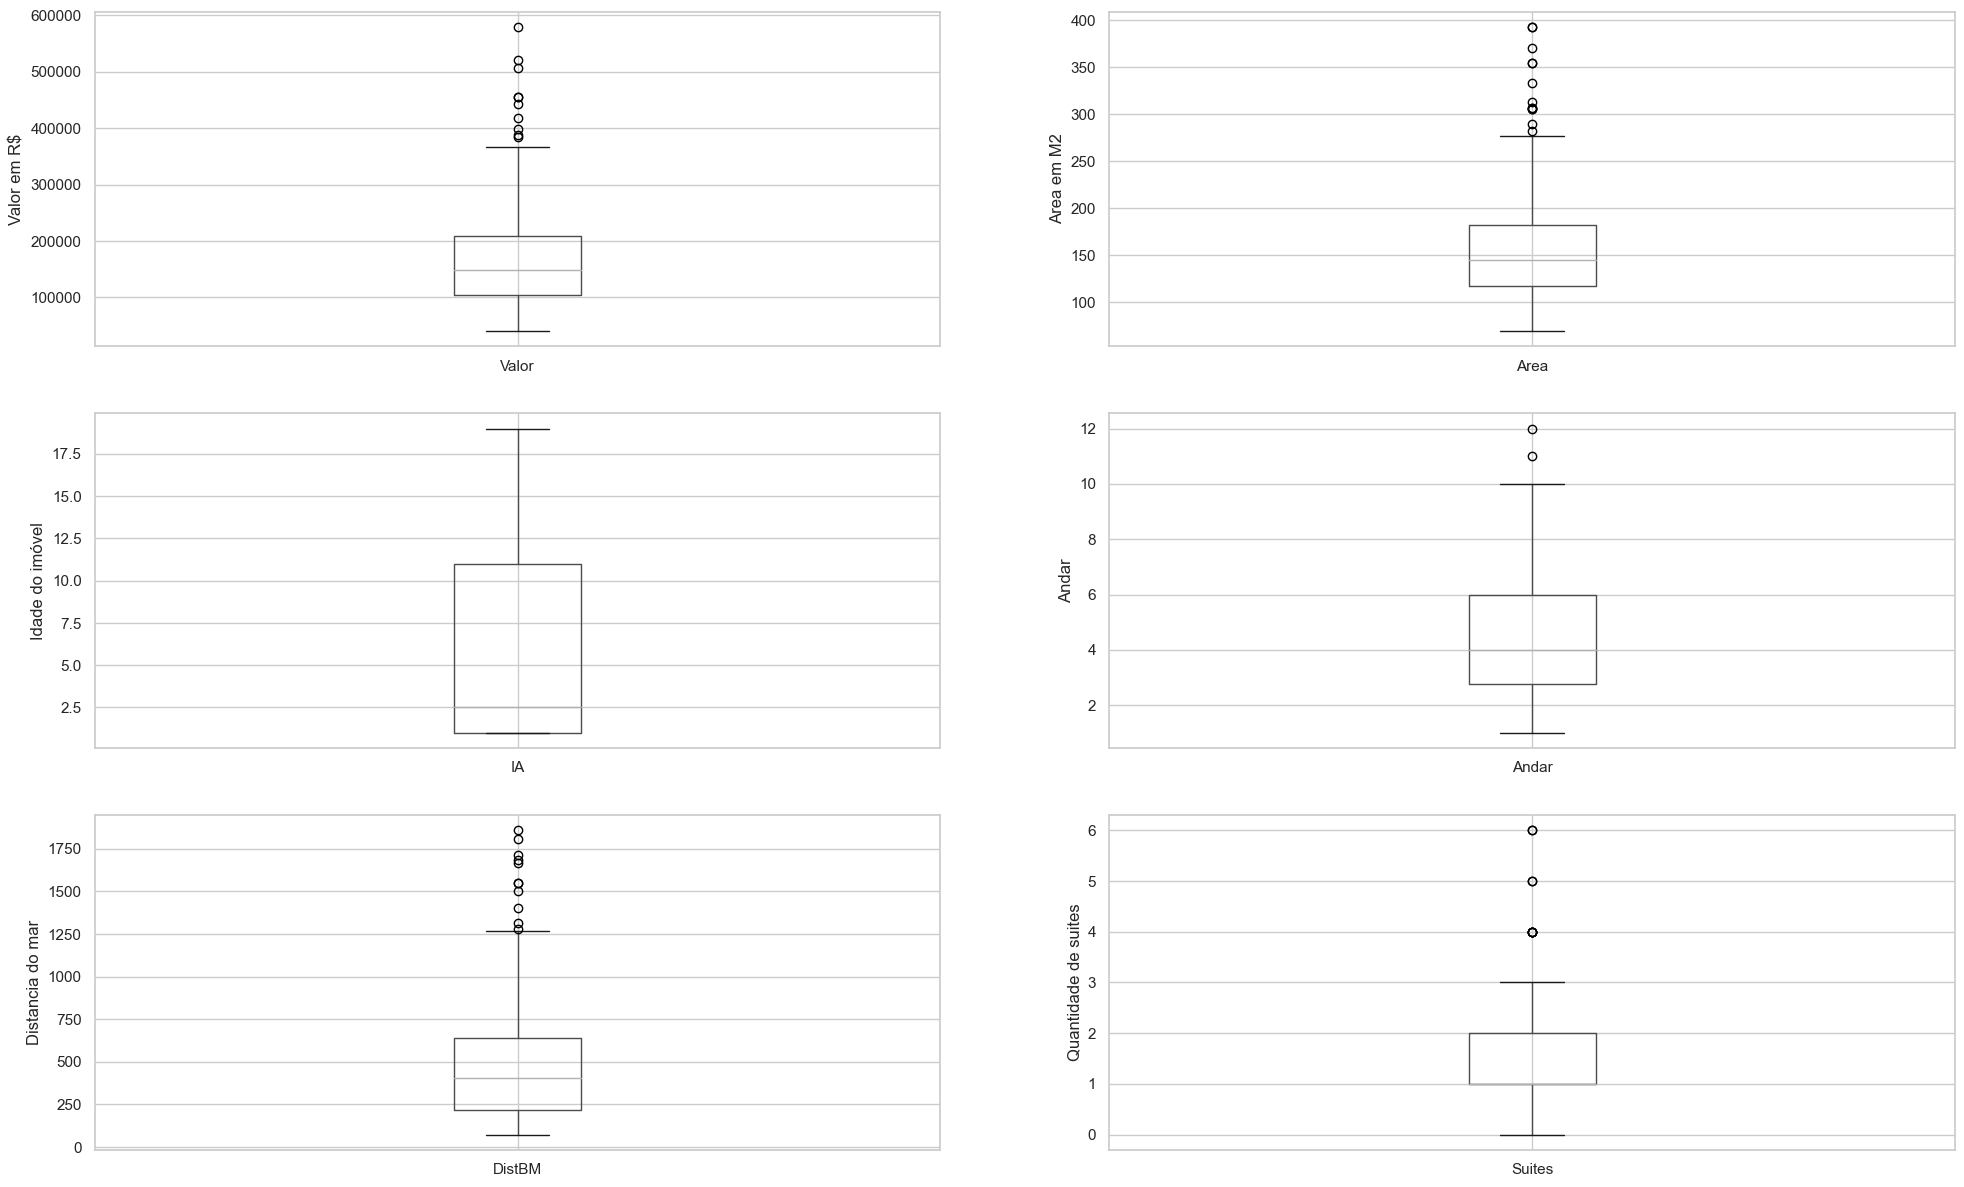

In [140]:
plt.figure(figsize=(24,20))

plt.subplot(4, 2, 1)
fig = imoveis.boxplot(column="Valor")
fig.set_title("")
fig.set_ylabel("Valor em R$")

plt.subplot(4, 2, 2)
fig = imoveis.boxplot(column="Area")
fig.set_title("")
fig.set_ylabel("Area em M2")

plt.subplot(4, 2, 3)
fig = imoveis.boxplot(column="IA")
fig.set_title("")
fig.set_ylabel("Idade do imóvel")

plt.subplot(4, 2, 4)
fig = imoveis.boxplot(column="Andar")
fig.set_title("")
fig.set_ylabel("Andar")

plt.subplot(4, 2, 5)
fig = imoveis.boxplot(column="DistBM")
fig.set_title("")
fig.set_ylabel("Distancia do mar")

plt.subplot(4, 2, 6)
fig = imoveis.boxplot(column="Suites")
fig.set_title("")
fig.set_ylabel("Quantidade de suites")

Analisando correlação das variaveis independentes em relação a variavel target

<Axes: >

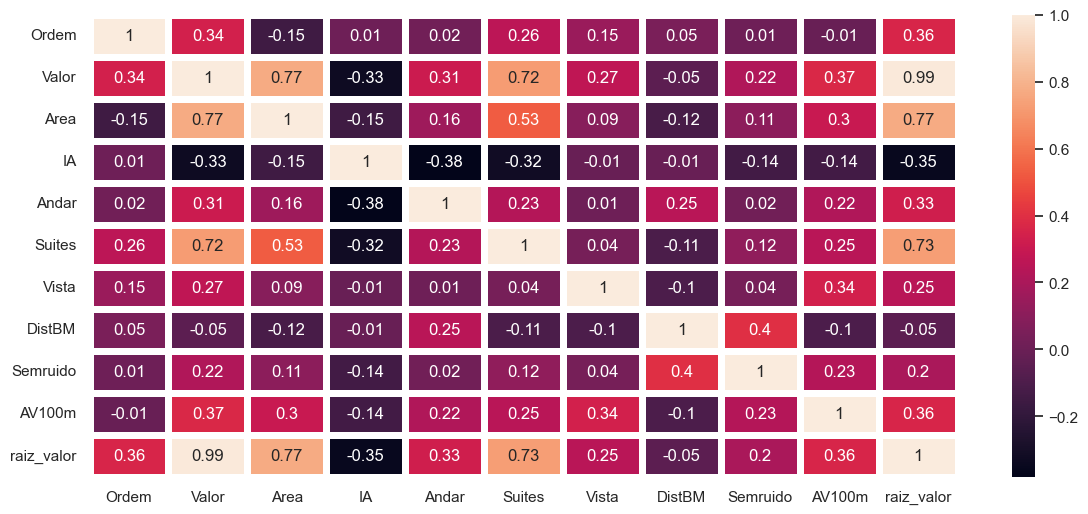

In [144]:
correlation_matrix = imoveis.corr().round(2)

fig, ax = plt.subplots(figsize=(14,6))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=5, ax=ax)

Correlação com dispersão